# visualization for epipolar line computation


In [1]:
from models.epipolar import *
import torch
import cv2

img_root = ['dataset/RealEstate_raw_data/test/test/000c3ab189999a83/45979267.png', 'dataset/RealEstate_raw_data/test/test/000c3ab189999a83/46012633.png']
info_root = 'dataset/RealEstate10K/test/000c3ab189999a83.txt'
import torch.nn.functional as F
from PIL import Image



c:\Users\Administrator\anaconda3\envs\zero123\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import os

img_set = []
intrinsics_set = []
pose_set = []
data_root = 'dataset/RealEstate_raw_data/test/test/'
file_name = os.path.basename(info_root)[:-4]

In [3]:
with open(info_root, 'r') as file:
    for line_num, line in enumerate(file, 1):
        if line_num == 1:  # Skip the first line
            continue

        values = list(line.strip().split())
        img_path = data_root + file_name +'/'+ values[0] + '.png'
        img_set.append(img_path)
        intrinsics_set.append(list(map(float, values[1:5])))
        pose_set.append(list(map(float, values[7:])))
        
        if line_num >= 3:
            break


In [4]:
[intrinsics_set[0]]

[[0.482334223, 0.857483078, 0.5, 0.5]]

In [5]:
value_pose1 = pose_set[0]
# rotation matrix
R1 = np.array([[value_pose1[0], value_pose1[1], value_pose1[2]],
               [value_pose1[4], value_pose1[5], value_pose1[6]],
               [value_pose1[8], value_pose1[9], value_pose1[10]]])
# translation vector
t1 = np.array([value_pose1[3],value_pose1[7],value_pose1[11]])

value_pose2 = pose_set[1]
R2 = np.array([[value_pose2[0], value_pose2[1], value_pose2[2]],
               [value_pose2[4], value_pose2[5], value_pose2[6]],
               [value_pose2[8], value_pose2[9], value_pose2[10]]])

t2 = np.array([value_pose2[3],value_pose2[7],value_pose2[11]])


T1 = np.array([[R1[0][0], R1[0][1], R1[0][2], t1[0]],
               [R1[1][0], R1[1][1], R1[1][2], t1[1]],
               [R1[2][0], R1[2][1], R1[2][2], t1[2]],
               [0, 0, 0, 1]])
T2 = np.array([[R2[0][0], R2[0][1], R2[0][2], t2[0]],
               [R2[1][0], R2[1][1], R2[1][2], t2[1]],
               [R2[2][0], R2[2][1], R2[2][2], t2[2]],
               [0, 0, 0, 1]])
T_rel = np.linalg.inv(T1) @ T2
R_rel = T_rel[:3, :3]
t_rel = T_rel[:3, 3]


width = 128
height = 128
K = np.array([[intrinsics_set[0][0]*width, 0, intrinsics_set[0][2]*width],
              [0, intrinsics_set[0][1]*height, intrinsics_set[0][3]*height],
              [0, 0, 1]])

T_rel = torch.tensor(T_rel, dtype=torch.float32)
R_rel = torch.tensor(R_rel, dtype=torch.float32)
t_rel = torch.tensor(t_rel, dtype=torch.float32)
K_rel = torch.tensor(K, dtype=torch.float32)

In [6]:
import torch
import torch.nn.functional as F
from PIL import Image
import torchvision.transforms

target_size = (128, 128)
#img_root = ['debug/188188000.png']
img1 = cv2.imread(img_root[0])
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img1 = torch.from_numpy(img1).permute(2, 0, 1).float().unsqueeze(0) / 255.0         #(1, 3,144, 176)

img2 = cv2.imread(img_root[0])
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2 = torch.from_numpy(img2).permute(2, 0, 1).float().unsqueeze(0) / 255.0

crop_func = torchvision.transforms.CenterCrop(target_size)


img1 = crop_func(img1)
img2 = crop_func(img2)

# show image
#import matplotlib.pyplot as plt
#
#plt.figure(figsize=(20, 10))
#plt.subplot(1, 2, 1)
#plt.imshow(img1.squeeze().permute(1, 2, 0))

tensor([ -0.4270,   0.9043, -23.8835])


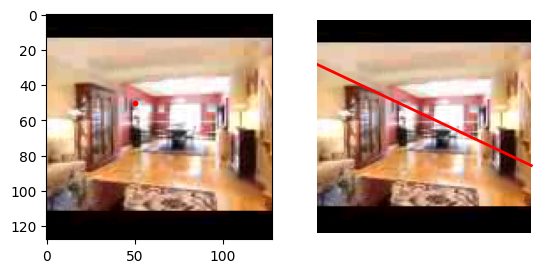

In [7]:
pi = torch.tensor([50, 50], dtype=torch.float32)
epipolar_line = epipolar_line_compute(K_rel, R_rel, t_rel, pi)
print(epipolar_line)

import matplotlib.pyplot as plt
# show epipolar line
plt.Figure(figsize=(20, 10))
x1 = 0
y1 = (-epipolar_line[2] - epipolar_line[0] * x1) / epipolar_line[1]
x2 = 128
y2 = (-epipolar_line[2] - epipolar_line[0] * x2) / epipolar_line[1]

img1_show = img1.squeeze().permute(1, 2, 0)
img2_show = img2.squeeze().permute(1, 2, 0)


plt.subplot(1, 2, 1)
plt.imshow(img1_show)

x_value = [pi[0]]
y_value = [pi[1]]
plt.scatter(x_value, y_value, color='red', s=10)

plt.subplot(1, 2, 2)
plt.imshow(img2_show)
plt.plot([x1, x2], [y1, y2], color='red', linewidth=2)
plt.axis('off')  # 关闭坐标轴
plt.show()

# Test for MiDas embeddings



In [ ]:
import cv2
import torch
import urllib.request

import matplotlib.pyplot as plt

url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
urllib.request.urlretrieve(url, filename)

c:\Users\Administrator\anaconda3\envs\zero123\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


('dog.jpg', <http.client.HTTPMessage at 0x123ac51a310>)

In [ ]:
model_type = "DPT_Large"     # MiDaS v3 - Large     (highest accuracy, slowest inference speed)
#model_type = "DPT_Hybrid"   # MiDaS v3 - Hybrid    (medium accuracy, medium inference speed)
#model_type = "MiDaS_small"  # MiDaS v2.1 - Small   (lowest accuracy, highest inference speed)

midas = torch.hub.load("intel-isl/MiDaS", model_type)

c:\Users\Administrator\anaconda3\envs\zero123\lib\site-packages\torch\hub.py:266: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/intel-isl/MiDaS/zipball/master" to C:\Users\Administrator/.cache\torch\hub\master.zip
Downloading: "https://github.com/isl-org/MiDaS/releases/download/v3/dpt_large_384.pt" to C:\Users\Administrator/.cache\torch\hub\checkpoints\dpt_large_384.pt
100%|██████████| 1.28G/1.28G [01:42<00:00, 13.4MB/s] 

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()

DPTDepthModel(
  (pretrained): Module(
    (model): VisionTransformer(
      (patch_embed): PatchEmbed(
        (proj): Conv2d(3, 1024, kernel_size=(16, 16), stride=(16, 16))
        (norm): Identity()
      )
      (pos_drop): Dropout(p=0.0, inplace=False)
      (patch_drop): Identity()
      (norm_pre): Identity()
      (blocks): Sequential(
        (0): Block(
          (norm1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (attn): Attention(
            (qkv): Linear(in_features=1024, out_features=3072, bias=True)
            (q_norm): Identity()
            (k_norm): Identity()
            (attn_drop): Dropout(p=0.0, inplace=False)
            (proj): Linear(in_features=1024, out_features=1024, bias=True)
            (proj_drop): Dropout(p=0.0, inplace=False)
          )
          (ls1): Identity()
          (drop_path1): Identity()
          (norm2): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (mlp): Mlp(
            (fc1): Linear(in_featur

In [ ]:
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

if model_type == "DPT_Large" or model_type == "DPT_Hybrid":
    transform = midas_transforms.dpt_transform
else:
    transform = midas_transforms.small_transform

Using cache found in C:\Users\Administrator/.cache\torch\hub\intel-isl_MiDaS_master


In [ ]:
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

input_batch = transform(img).to(device)

In [ ]:
img.shape

(1213, 1546, 3)

In [ ]:
with torch.no_grad():
    prediction = midas(input_batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

output = prediction.cpu().numpy()

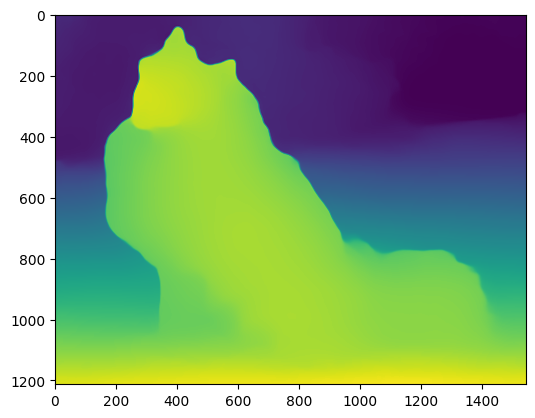

In [ ]:
plt.imshow(output)